***Notebook original description*** 

<br>
   File name   : YOLOv3_colab_training.ipynb<br>
   Author      : PyLessons<br>
   Created date: 2020-09-30<br>
   Website     : https://pylessons.com/YOLOv3-TF2-GoogleColab<br>
   GitHub      : https://github.com/pythonlessons/TensorFlow-2.x-YOLOv3<br>
   Description : Train custom model on Google colab tutorial<br>
<br>
================================================================


**Open this notebook from google drive**<br>
**Go to "Edit" -> "Notebook settings" and enable GPU.**


In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



**Connect and authorize google drive with google colab:**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
gdrive	sample_data


**Open our project "TensorFlow-2.x-YOLOv3" direcotry in google drive:**

In [2]:
%cd gdrive/MyDrive/CV_2_YOLO/
!ls

/content/gdrive/MyDrive/CV_2_YOLO
checkpoints		  LICENSE	       requirements.txt
Collect_training_data.py  log		       tools
deep_sort		  mnist		       train.py
detection_custom.py	  model_data	       UNO
detection_demo.py	  object_tracker.py    yolov3
detect_mnist.py		  __pycache__	       YOLOv3_colab_training.ipynb
evaluate_mAP.py		  README.dataset.txt
IMAGES			  README.roboflow.txt


**Install all required libraries for our project:**

In [3]:
!pip install -r ./requirements.txt

  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached h5py-2.10.0-cp36-cp36m-win_amd64.whl (2.4 MB)
  Using cached PyYAML-5.4.1-cp36-cp36m-win_amd64.whl (209 kB)
  Using cached jmespath-0.10.0-py2.py3-none-any.whl (24 kB)
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=95db30271f33cb1b1f0fd603a118a0c17ea17be39c671f6877a41dd73ecd179f
  Stored in directory: c:\users\yarik\appdata\local\pip\cache\wheels\90\1d\93\c863ee832230df5cfc25ca497b3e88e0ee3ea9e44adc46ac62
Successfully built wget
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
    

**Download yolov3.weights if you don't have it:**

**Test if TensorFlow works with gpu for you, in output should see similar results:**
```
2.3.0
'/device:GPU:0'
```

In [3]:
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()

2.3.1


''

In [4]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import tensorflow as tf
from yolov3.yolov4 import Create_Yolo
from yolov3.utils import load_yolo_weights, detect_image, Load_Yolo_model
from yolov3.configs import *

**Run `XML_to_YOLOv3.py` script to convert XML files to YOLOv3 annotations files:**

In [ ]:
!python tools/XML_to_YOLOv3.py

Выходные данные были обрезаны до нескольких последних строк (5000).
/content/gdrive/MyDrive/CV_2_YOLO/UNO/train/109126652_jpg.rf.628d3d72a7e54bc0ca30bdc6e48a5cbf.jpg 158,173,178,196,1 190,164,207,183,5 218,156,238,180,9
/content/gdrive/MyDrive/CV_2_YOLO/UNO/train/947032775_jpg.rf.62e665317714625b92361f2e489e2552.jpg 137,156,172,192,11 168,192,208,228,2 187,235,225,268,10
/content/gdrive/MyDrive/CV_2_YOLO/UNO/train/231364261_jpg.rf.627a512621788109fb2dfab1583d7a97.jpg 175,78,203,110,9 208,89,239,124,14 248,115,282,151,14
/content/gdrive/MyDrive/CV_2_YOLO/UNO/train/160024061_jpg.rf.62d3b1da0849c7a37b2ff4eafb43be3d.jpg 160,160,196,196,0 191,191,227,223,4 217,233,253,261,4
/content/gdrive/MyDrive/CV_2_YOLO/UNO/train/921621431_jpg.rf.62c1e312a7406b23411ee56a18a80fac.jpg 115,169,143,203,1 160,171,184,196,5 202,174,232,206,4
/content/gdrive/MyDrive/CV_2_YOLO/UNO/train/625931279_jpg.rf.6285718c022c23ca6381fadc0183d2a5.jpg 257,185,274,201,5 262,202,290,218,12 274,224,300,244,9
/content/gdrive/M

**Start training custom model:**

In [ ]:
from train import *
tf.keras.backend.clear_session()
main()

Выходные данные были обрезаны до нескольких последних строк (5000).
epoch: 0 step: 1325/1574, lr:0.000042, giou_loss:   5.11, conf_loss:  29.68, prob_loss:  22.94, total_loss:  57.73
epoch: 0 step: 1326/1574, lr:0.000042, giou_loss:   6.39, conf_loss:  28.84, prob_loss:  34.56, total_loss:  69.79
epoch: 0 step: 1327/1574, lr:0.000042, giou_loss:   5.56, conf_loss:  28.39, prob_loss:  34.17, total_loss:  68.13
epoch: 0 step: 1328/1574, lr:0.000042, giou_loss:   4.23, conf_loss:  28.58, prob_loss:  24.70, total_loss:  57.51
epoch: 0 step: 1329/1574, lr:0.000042, giou_loss:   4.22, conf_loss:  28.23, prob_loss:  27.26, total_loss:  59.71
epoch: 0 step: 1330/1574, lr:0.000042, giou_loss:   4.74, conf_loss:  27.46, prob_loss:  33.08, total_loss:  65.28
epoch: 0 step: 1331/1574, lr:0.000042, giou_loss:   5.57, conf_loss:  28.32, prob_loss:  29.17, total_loss:  63.06
epoch: 0 step: 1332/1574, lr:0.000042, giou_loss:   3.93, conf_loss:  27.66, prob_loss:  27.61, total_loss:  59.21
epoch: 0 ste

**Create Yolo v3 custom model and load custom trained weights**

In [5]:
yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE, CLASSES=TRAIN_CLASSES)
yolo.load_weights("./checkpoints/yolov3_custom_UNO") # use weights

**Test the detection with `IMAGES/UNO_6.jpg` image**

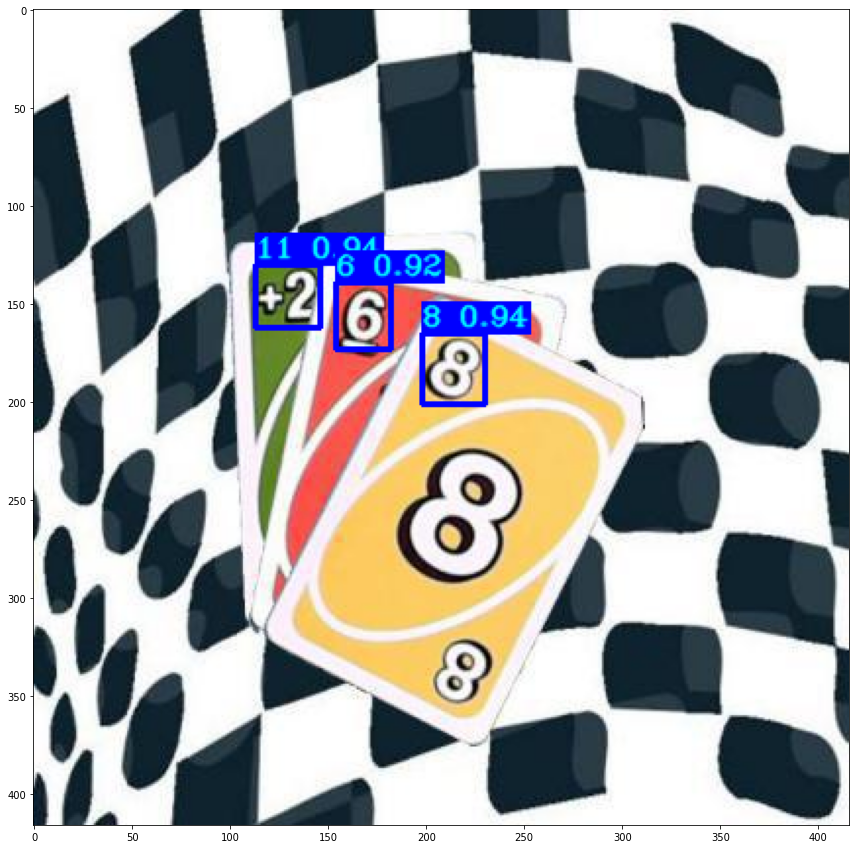

In [8]:
image_path   = "./IMAGES/UNO_6.jpg"
image = detect_image(yolo, image_path, "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

In [1]:
!python detection_custom.py

Traceback (most recent call last):
  File "detection_custom.py", line 13, in <module>
    import cv2
ImportError: No module named cv2


In [1]:
!pip install -r requirements.txt